In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize dan reshape
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)  # One-hot encoding untuk label
y_test = to_categorical(y_test, 10)




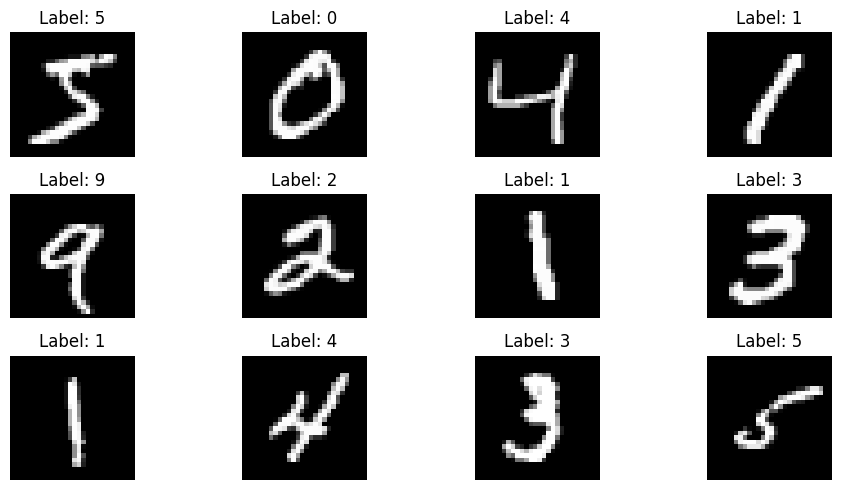

In [3]:
import matplotlib.pyplot as plt

# Tampilkan 12 sampel gambar dari dataset MNIST
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # reshape kembali ke ukuran 28x28
    plt.title(f"Label: {y_train[i].argmax()}")  # Menampilkan label asli dari gambar
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Definisikan LeNet Model
def LeNet(input_shape=(28, 28, 1), num_classes=10):
    return tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(6, 5, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(16, 5, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

In [5]:
# Initialize and compile the model
lenet_model = LeNet(input_shape=(28, 28, 1), num_classes=10)
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:


lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lenet_model.fit(x_train, y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = lenet_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.7901 - loss: 0.7030 - val_accuracy: 0.9720 - val_loss: 0.0859
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 57ms/step - accuracy: 0.9725 - loss: 0.0891 - val_accuracy: 0.9801 - val_loss: 0.0600
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9816 - loss: 0.0584 - val_accuracy: 0.9865 - val_loss: 0.0410
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9849 - val_loss: 0.0522

Test Accuracy: 0.9849


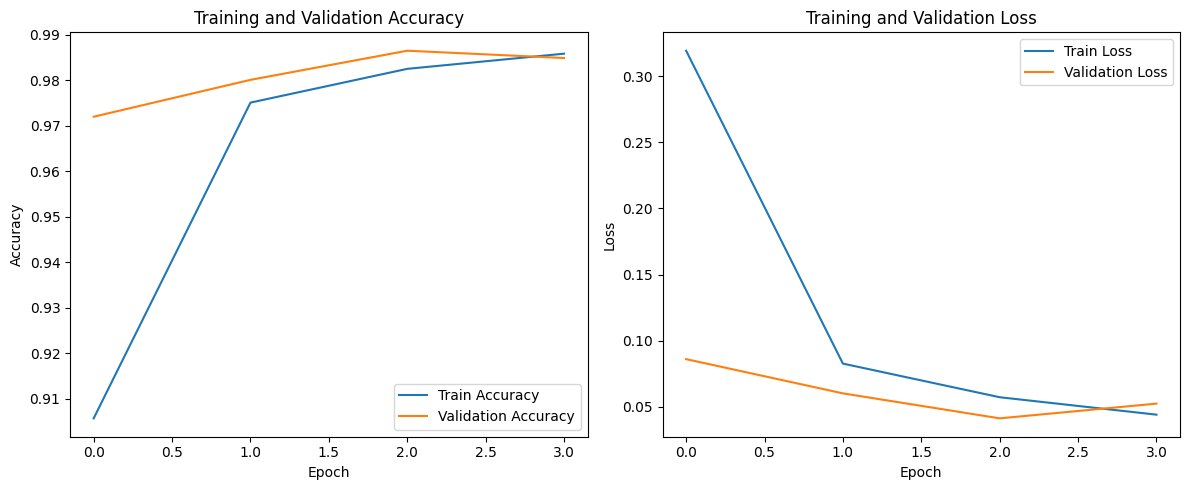

In [7]:
import matplotlib.pyplot as plt

# Plot Akurasi dan Validasi Akurasi
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss dan Validasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tampilkan Plot
plt.tight_layout()
plt.show()

**Melakukan pengujian dengan 10 gambar yang diambil dari dataset.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


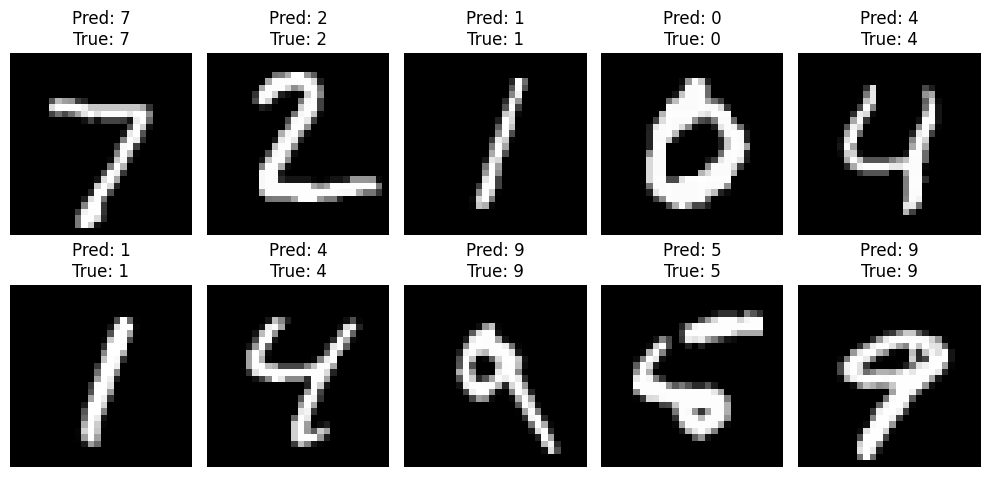

Accuracy on 10 sample images: 100.00%


In [8]:

import numpy as np


# Select 10 samples without labels
x_sample = x_test[:10]
y_sample = y_test[:10]

# Predict using the trained model
y_pred = lenet_model.predict(x_sample)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_sample, axis=1)

# Plot the 10 images with predicted and actual labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_true_labels[i]}")
    plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

# Calculate and print accuracy on the 10 samples
accuracy = np.sum(y_pred_labels == y_true_labels) / len(y_true_labels)
print(f"Accuracy on 10 sample images: {accuracy * 100:.2f}%")


In [9]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Tabel Evaluasi Model LeNet pada MNIST:")
print(report_df[['precision', 'recall', 'f1-score', 'support']])

Tabel Evaluasi Model LeNet pada MNIST:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      2.0
2                   1.0     1.0       1.0      1.0
4                   1.0     1.0       1.0      2.0
5                   1.0     1.0       1.0      1.0
7                   1.0     1.0       1.0      1.0
9                   1.0     1.0       1.0      2.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     10.0
weighted avg        1.0     1.0       1.0     10.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


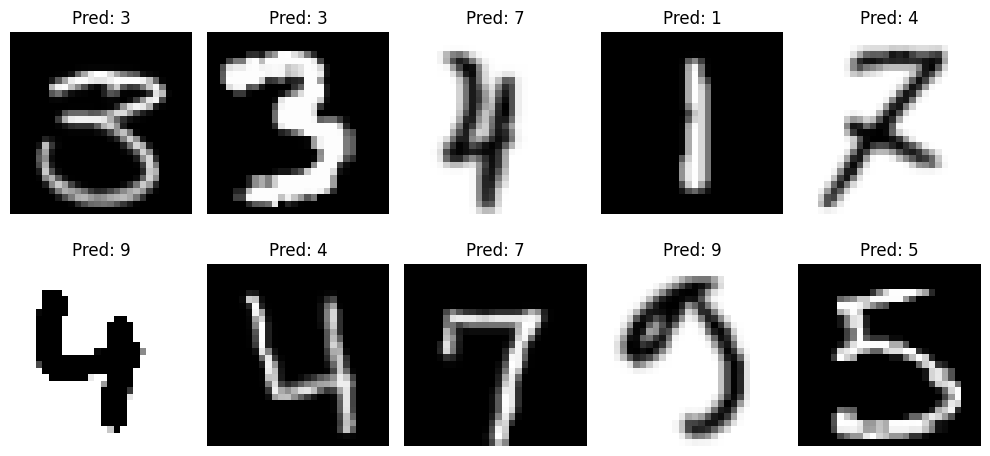

In [10]:
import os
import cv2
from PIL import Image
import numpy as np

folder = '/content/drive/MyDrive/Deep Learning/Modul 6/Data Uji modul 6'

image_list = []
for filename in os.listdir(folder):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    img_path = os.path.join(folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar dalam grayscale

    # Resize gambar ke 28x28 piksel
    img = cv2.resize(img, (28, 28))

    # Normalisasi nilai piksel ke rentang 0-1
    img = img.astype('float32') / 255.0

    # Reshape menjadi bentuk (28, 28, 1) yang sesuai dengan input model
    img = img.reshape(28, 28, 1)

    image_list.append(img)

# Ubah list gambar ke dalam array numpy
x_sample_custom = np.array(image_list)


# Lakukan prediksi dengan model yang telah dilatih
y_pred_custom = lenet_model.predict(x_sample_custom)
y_pred_labels_custom = np.argmax(y_pred_custom, axis=1)


# Plot gambar-gambar yang telah diuji
plt.figure(figsize=(10, 5))
for i in range(len(x_sample_custom)):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_sample_custom[i].reshape(28, 28), cmap='gray')
  plt.title(f"Pred: {y_pred_labels_custom[i]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
y_true_labels = [3,3,4,1,7,4,4,7,9,5]

# Calculate and print accuracy on the 10 samples
accuracy = np.sum(y_pred_labels_custom == y_true_labels) / len(y_true_labels)
print(f"Accuracy on 10 sample images: {accuracy * 100:.2f}%")

Accuracy on 10 sample images: 70.00%


In [16]:
import pandas as pd
from sklearn.metrics import classification_report

y_true_labels = [3,3,4,1,7,4,4,7,9,5]
report = classification_report(y_true_labels, y_pred_labels_custom, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Tabel Evaluasi Model LeNet pada MNIST:")
print(report_df[['precision', 'recall', 'f1-score', 'support']])

Tabel Evaluasi Model LeNet pada MNIST:
              precision    recall  f1-score  support
1                  1.00  1.000000  1.000000      1.0
3                  1.00  1.000000  1.000000      2.0
4                  0.50  0.333333  0.400000      3.0
5                  1.00  1.000000  1.000000      1.0
7                  0.50  0.500000  0.500000      2.0
9                  0.50  1.000000  0.666667      1.0
accuracy           0.70  0.700000  0.700000      0.7
macro avg          0.75  0.805556  0.761111     10.0
weighted avg       0.70  0.700000  0.686667     10.0


**Model AlexNet**

In [16]:
# Definisikan AlexNet Model
def AlexNet(input_shape=(227, 227, 3), num_classes=10):
    return tf.keras.Sequential([
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

In [18]:
# Initialize and compile the model
AlexNet_model = AlexNet(input_shape=(227, 227, 3), num_classes=10)
AlexNet_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 27, 27, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 27, 27, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 27, 27, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │     177,213,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,782,922 (754.48 MB)

 Trainable params: 197,782,922 (754.48 MB)

 Non-trainable params: 0 (0.00 B)